In [30]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
from PIL import Image

RGB
(800, 542)


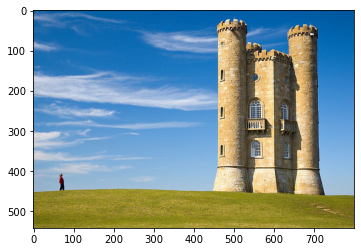

In [31]:
# Opening Image

img = Image.open('image.jpg')
print(img.mode)
print(img.size)
imshow(np.asarray(img))

In [32]:
img_array = np.array(img)
print(img_array.shape)

(542, 800, 3)


In [33]:
# Energy Calculation (M1.1)

# energy = np.zeros((img.size[1], img.size[0]))
energy = img_array.copy()

for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
        neighbors = {}
        
        # Edge Cases
        if i == 0:
            neighbors['up'] = img_array[i][j]
        
        if j == 0:
            neighbors['left'] = img_array[i][j]
        
        if i == img_array.shape[0] - 1:
            neighbors['down'] = img_array[i][j]
        
        if j == img_array.shape[1] - 1:
            neighbors['right'] = img_array[i][j]
        
        # General Case
        if 'up' not in neighbors:
            neighbors['up'] = img_array[i-1][j]
        
        if 'down' not in neighbors:
            neighbors['down'] = img_array[i+1][j]
        
        if 'left' not in neighbors:
            neighbors['left'] = img_array[i][j-1]
        
        if 'right' not in neighbors:
            neighbors['right'] = img_array[i][j+1]
        
        dx_r = int(neighbors['left'][0]) - int(neighbors['right'][0])
        dx_g = int(neighbors['left'][1]) - int(neighbors['right'][1])
        dx_b = int(neighbors['left'][2]) - int(neighbors['right'][2])
        dx = (dx_r ** 2) + (dx_g ** 2) + (dx_b ** 2)
        
        dy_r = int(neighbors['up'][0]) - int(neighbors['down'][0])
        dy_g = int(neighbors['up'][1]) - int(neighbors['down'][1])
        dy_b = int(neighbors['up'][2]) - int(neighbors['down'][2])
        dy = (dy_r ** 2) + (dy_g ** 2) + (dy_b ** 2)
        
        e = np.sqrt(dx + dy)
        energy[i][j] = int(e)

print(energy.shape)
print(energy)

(542, 800, 3)
[[[  8   8   8]
  [ 11  11  11]
  [ 13  13  13]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  2   2   2]
  [ 15  15  15]
  [ 10  10  10]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  7   7   7]
  [  7   7   7]
  [ 12  12  12]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 ...

 [[ 77  77  77]
  [ 81  81  81]
  [ 12  12  12]
  ...
  [ 24  24  24]
  [ 49  49  49]
  [ 24  24  24]]

 [[109 109 109]
  [  9   9   9]
  [ 49  49  49]
  ...
  [ 44  44  44]
  [119 119 119]
  [ 34  34  34]]

 [[ 61  61  61]
  [ 23  23  23]
  [ 52  52  52]
  ...
  [ 18  18  18]
  [ 40  40  40]
  [ 73  73  73]]]


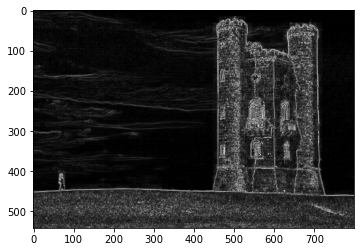

In [34]:
# Displaying Energy (M1.2)

energy_img = Image.fromarray(energy)
# energy_img.show()
imshow(np.asarray(energy_img))

In [35]:
# Computing Seams (M2)

dp_vertical = np.zeros((energy.shape[0], energy.shape[1]))

for j in range(dp_vertical.shape[1]):
    dp_vertical[0][j] = energy[0][j][0]

for i in range(1, dp_vertical.shape[0]):
    for j in range(dp_vertical.shape[1]):
        if j == 0:
            dp_vertical[i][j] = int(energy[i][j][0]) + min(energy[i-1][j][0], energy[i-1][j+1][0])
        elif j == dp_vertical.shape[1] - 1:
            dp_vertical[i][j] = int(energy[i][j][0]) + min(energy[i-1][j-1][0], energy[i-1][j][0])
        else:
            dp_vertical[i][j] = int(energy[i][j][0]) + min(energy[i-1][j-1][0], energy[i-1][j][0], energy[i-1][j+1][0])

pd.DataFrame(dp_vertical)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.0,11.0,13.0,12.0,8.0,16.0,15.0,10.0,18.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.0,23.0,21.0,17.0,19.0,35.0,33.0,22.0,18.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,9.0,21.0,17.0,34.0,24.0,42.0,22.0,10.0,15.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,13.0,15.0,11.0,26.0,23.0,31.0,28.0,30.0,9.0,15.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,11.0,10.0,19.0,20.0,25.0,31.0,30.0,36.0,24.0,31.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,60.0,82.0,50.0,106.0,51.0,191.0,75.0,120.0,84.0,114.0,...,89.0,68.0,110.0,59.0,54.0,102.0,23.0,128.0,71.0,106.0
538,104.0,33.0,45.0,48.0,68.0,37.0,108.0,65.0,122.0,68.0,...,77.0,78.0,56.0,95.0,54.0,46.0,69.0,48.0,155.0,159.0
539,89.0,93.0,24.0,83.0,68.0,91.0,26.0,69.0,121.0,76.0,...,80.0,43.0,41.0,81.0,157.0,159.0,137.0,59.0,84.0,137.0
540,186.0,21.0,61.0,44.0,85.0,24.0,39.0,47.0,68.0,69.0,...,91.0,47.0,71.0,68.0,159.0,115.0,157.0,68.0,143.0,58.0


In [36]:
seams = []

def vertical_seam(dp_vertical):
    seam = []
    minimum = min(dp_vertical[-1])
    print("minimum in last row: " + str(minimum))
    index = np.where(dp_vertical[-1] == minimum)
    print("index: " + "j = " + str(index[0][0]))
    i = len(dp_vertical)-1
    j = index[0][0]
    seam.append([i, j])

    for row in range(len(dp_vertical) - 1, 0, -1):
        if j == 0:
            up = dp_vertical[row-1][j]
            up_right = dp_vertical[row-1][j+1]
            if up_right < up:
                i = row-1
                j = j+1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
        elif j == len(dp_vertical[row]) - 1:
            up = dp_vertical[row-1][j]
            up_left = dp_vertical[row-1][j-1]
            if up_left < up:
                i = row-1
                j = j-1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
        else:
            up = dp_vertical[row-1][j]
            up_left = dp_vertical[row-1][j-1]
            up_right = dp_vertical[row-1][j+1]
            if up_left <= up and up_left <= up_right:
                i = row-1
                j = j-1
                seam.append([i, j])
            elif up_right <= up and up_right <= up_left:
                i = row-1
                j = j+1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    return seam

seams.append(vertical_seam(dp_vertical))
print(seams)

minimum in last row: 10.0
index: j = 769
[[[541, 769], [540, 770], [539, 770], [538, 771], [537, 770], [536, 769], [535, 770], [534, 769], [533, 768], [532, 767], [531, 768], [530, 768], [529, 767], [528, 768], [527, 769], [526, 768], [525, 769], [524, 770], [523, 771], [522, 771], [521, 770], [520, 769], [519, 768], [518, 769], [517, 770], [516, 771], [515, 771], [514, 772], [513, 773], [512, 774], [511, 775], [510, 776], [509, 775], [508, 776], [507, 777], [506, 777], [505, 778], [504, 777], [503, 776], [502, 776], [501, 775], [500, 774], [499, 773], [498, 772], [497, 772], [496, 772], [495, 772], [494, 773], [493, 772], [492, 772], [491, 773], [490, 773], [489, 774], [488, 773], [487, 772], [486, 773], [485, 772], [484, 771], [483, 770], [482, 771], [481, 770], [480, 771], [479, 770], [478, 770], [477, 771], [476, 770], [475, 769], [474, 768], [473, 768], [472, 768], [471, 767], [470, 768], [469, 767], [468, 768], [467, 769], [466, 770], [465, 770], [464, 769], [463, 768], [462, 767

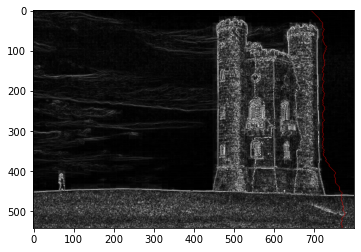

In [37]:
for coord in seams[0]:
    energy[coord[0]][coord[1]] = [255, 0 ,0]

energy_img = Image.fromarray(energy)
imshow(np.asarray(energy_img))
energy_img.show()